1️⃣importing libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Load the dataset and convert to DataFrame

In [ ]:
# Load the dataset and convert to DataFrame
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

Splitting dataset into training and test sets.

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Creating a DataFrame that will be used to keep track of model performance.

In [ ]:
# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

Explaining that this is a reusable function to plot a confusion matrix nicely as a heatmap

In [ ]:
# Helper function for confusion matrix plotting
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

# Train & evaluate models
## 1. Logistic Regression

Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



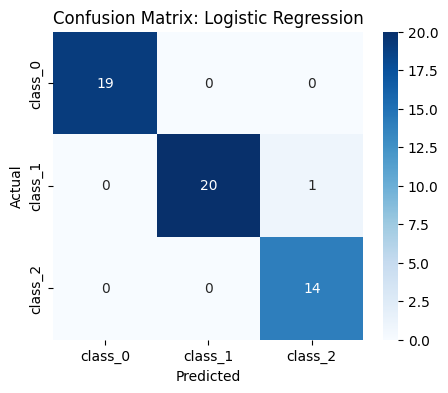

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression\n", classification_report(y_test, y_pred_lr))
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
results.loc[len(results)] = ['Logistic Regression', accuracy_score(y_test, y_pred_lr)]

Imports the StandardScaler class from scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Checking for missing data and correcting it

In [ ]:
print(X.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

Imports and setup


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



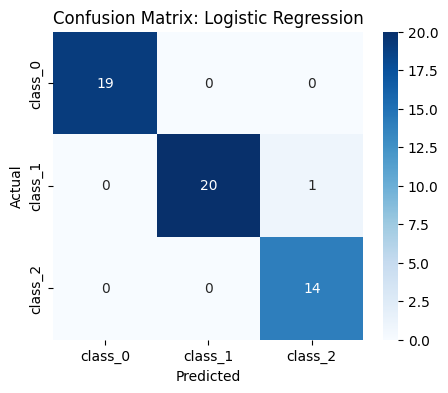


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



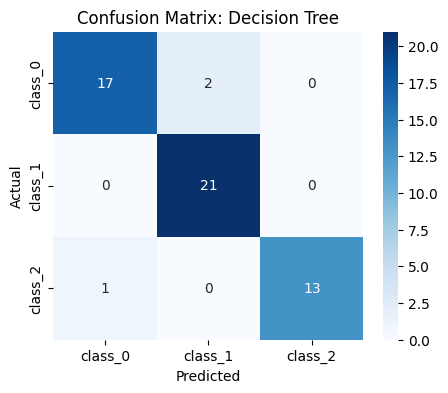


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



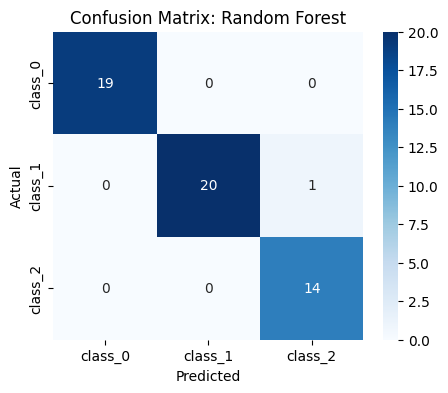


=== KNN ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



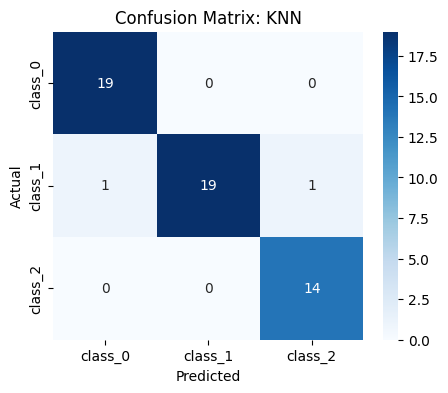


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



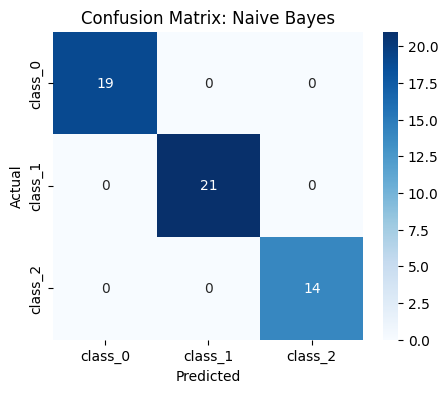


=== SVM ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



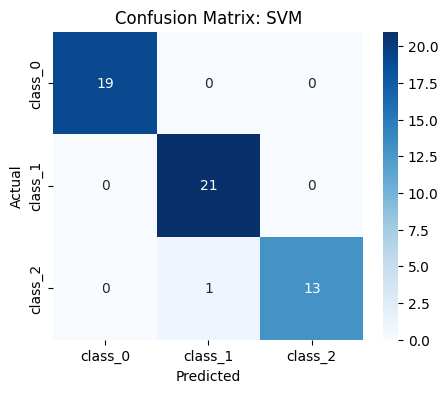

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

results = pd.DataFrame(columns=['Model', 'Accuracy'])

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=wine.target_names,
                yticklabels=wine.target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds))

    plot_conf_matrix(y_test, preds, f'Confusion Matrix: {name}')

    results.loc[len(results)] = [name, acc]

                 Model  Accuracy
0  Logistic Regression  0.981481
1        Decision Tree  0.944444
2        Random Forest  0.981481
3                  KNN  0.962963
4          Naive Bayes  1.000000
5                  SVM  0.981481


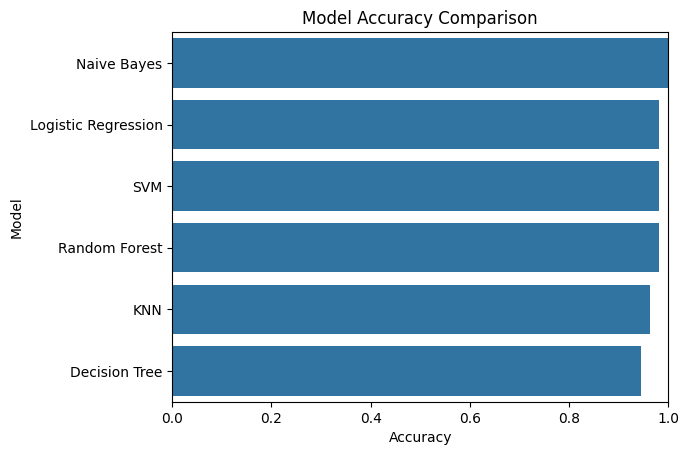

In [ ]:
# Show results
print(results)

# Bar plot
sns.barplot(x='Accuracy', y='Model', data=results.sort_values(by='Accuracy', ascending=False))
plt.title('Model Accuracy Comparison')
plt.xlim(0,1)
plt.show()